In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

In [15]:
YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')

In [16]:
yb_df1 = YearinBusinessDF


In [32]:
yb_df1= yb_df1.loc[:, ['Meaning of Years in business code (YIBSZFI_LABEL)']]
yb_df1['Meaning of Years in business code (YIBSZFI_LABEL)'] = yb_df1['Meaning of Years in business code (YIBSZFI_LABEL)'].replace({
    'Firms with less than 2 years in business': '0 to 2', 
    'Firms with 2 to 3 years in business': '2-3', 
    'Firms with 4 to 5 years in business': '4-5',
    'Firms with 6 to 10 years in business' : '6-10',
    'Firms with 11 to 15 years in business' : '11-15',
    'Firms with 16 or more years in business' : '16 plus',
})

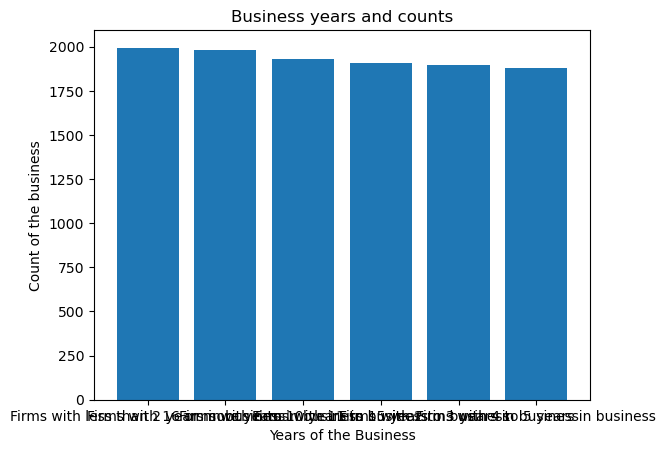

In [34]:
#### Filter the DataFrame to exclude rows with YIBSZFI_LABEL equal to 'Meaning of years in business code'
# yb_df = yb_df1.loc[yb_df1['YIBSZFI_LABEL'] != 'Meaning of Years in business code']

# Plot the data using the filtered DataFrame
plt.bar(yb_df['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().index, yb_df['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().values)

plt.xlabel('Years of the Business')
plt.ylabel('Count of the business')
plt.title('Business years and counts')
plt.show()

In [27]:
yb_df2 = YearinBusinessDF 

In [28]:

yb_df2[['Meaning of Race code (RACE_GROUP_LABEL)']].drop_duplicates()

,Meaning of Race code (RACE_GROUP_LABEL)
0,Total
96,White
138,Black or African American
180,American Indian and Alaska Native
219,Asian
261,Native Hawaiian and Other Pacific Islander
297,Minority
321,Equally minority/nonminority
345,Nonminority
638,Classifiable


In [29]:
replacement_dict = {
    'American Indian and Alaska Native': 'Native American ', 
    'Native Hawaiian and Other Pacific Islander': 'Islander', 
    'Equally minority/nonminority': 'Minority',
    'Black or African American': 'African American',
    'Total': 'Unclassifiable'
}
yb_df2['Meaning of Race code (RACE_GROUP_LABEL)'] = yb_df2['Meaning of Race code (RACE_GROUP_LABEL)'].replace(replacement_dict)



In [30]:
#Tree map on SEX_LABEL
#### male and female proportion on business in USA(exclude total from values)
import plotly.express as px
# count the number of value in the SEX_LABEL column, excluding the "Total" value
grouped_df = yb_df2[yb_df2['Meaning of Sex code (SEX_LABEL)'] != 'Total']['Meaning of Sex code (SEX_LABEL)'].value_counts().reset_index(name='Count')
grouped_df.rename(columns={'index': 'Sex'}, inplace=True)

# create treemap with the grouped data
fig = px.treemap(grouped_df, path=['Sex'], values='Count')

# show the plot
fig.show()
